# CS 6220 Data Mining — Assignment 3 — Samuel Steiner — Exploring Data with PCA

In [1]:
# imports and initial load of data
from sklearn import datasets, decomposition, discriminant_analysis
data = datasets.load_iris()
X = data.data
Y = data.target

## Part 1 - PCA [40 Points]:
You will need to use PCA, which is implemented in scikit-learn. See this link for documentation http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

### 1. Apply PCA projection of the features of IRIS dataset in 2 dimensions

In [2]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

### 2. Show how much variance ratio is explained by the reduced dimension.

In [11]:
print(f'Variance ratio explained: {", ".join([f"(Dimension: {i+1}, Ratio: {j*100:.2f}%)" for i, j in enumerate(pca.explained_variance_ratio_)])}')

Variance ratio explained: (Dimension: 1, Ratio: 92.46%), (Dimension: 2, Ratio: 5.31%)


## Part 2 - Another Reduction Method [35 Points]:

### 1. Apply another reduction method of your choice on the features of IRIS dataset in 2 dimensions.

I will be applying Linear Discriminant Analysis, which I came across while looking at sci-kit learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis  

In [6]:
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, Y)
x_lda = lda.transform(X)

### 2. Show scatter plot of the reduced dimension. Use separate color for each class of the data.

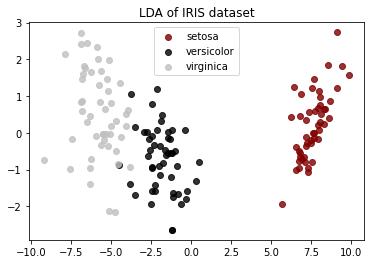

In [8]:
import matplotlib.pyplot as plt

plt.figure()
colors = ["maroon", "black", "silver"]
target_names = data.target_names
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        x_lda[Y == i, 0], x_lda[Y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

### 3. Show how much variance ratio is explained by the reduced dimension.

In [12]:
print(f'Variance ratio explained: {", ".join([f"(Dimension: {i+1}, Ratio: {j*100:.2f}%)" for i, j in enumerate(lda.explained_variance_ratio_)])}')

Variance ratio explained: (Dimension: 1, Ratio: 99.12%), (Dimension: 2, Ratio: 0.88%)


## Part 3 Conceptual Question [25 Points]:
Answer the following question in the same ipython notebook.

### 1. Compare the variance ratio explained by the 2-dimensions of the methods you haveu used. Which is better?

The variance ratio betweeen the two method were similar in that dimension 1 had most of the variance and explained above 90% of the variance but ultimately, LDA's dimension 1 had a higher variance ratio of 99.12% vs PCA's 92.46%. This seems to showcase that LCA has a better ability to extract the variance out of the dataset.

### 2. Compare the scatter plot of the two methods after reduction. Which is a better method for separating the different classes of data?

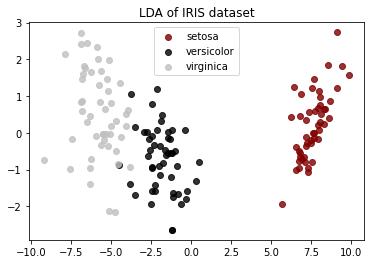

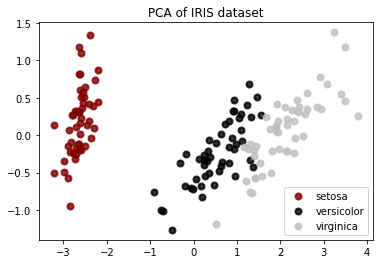

In [13]:
plt.figure()
colors = ["maroon", "black", "silver"]
target_names = data.target_names
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        x_lda[Y == i, 0], x_lda[Y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")


plt.figure()
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        x_pca[Y == i, 0], x_pca[Y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")


plt.show()

The LCA process is a seemingly better method looking at the scatterplots, the PCA has more overlap of the classes of virginica and versicolor. The fewer overlapping points allows us to identify the classes easier which is the way that I would measure which method is better absed on the scatterplots.

### 3. What is the primary difference between the two methods? Which method works better in this case and why?

The biggest difference between PCA and LDA is that PCA is an unsupervised method while LDA is a supervised method. This means that LDA uses the class labels to help derive the dimensions. PCA finds the variance within the data and LDA finds the variance between the classses. Since the Iris dataset is labled with the classes LDA is a better method as it gives us results with a better outcome. Meaning our new dimension explain a lot of information about the dataset. 